In [1]:
import pandas as pd
import numpy as np
import matplotlib,plotly as plt
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SalaryData.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
df_numeric = df.select_dtypes(include = ['number'])
df_numeric

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
370,35.0,8.0,85000.0
371,43.0,19.0,170000.0
372,29.0,2.0,40000.0
373,34.0,7.0,90000.0


In [4]:
df_numeric.shape

(375, 3)

In [5]:
df_numeric.isnull().sum()

Age                    2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
df_numeric = df_numeric.dropna(axis = 0 , how = 'any')
df_numeric.isnull().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

In [7]:
df_numeric.shape

(373, 3)

In [8]:
from sklearn.preprocessing import StandardScaler

standard_scaling = StandardScaler()

Scaled_data = standard_scaling.fit_transform(df_numeric)
Scaled_df = pd.DataFrame(Scaled_data , columns = df_numeric.columns)

Scaled_df

,Age,Years of Experience,Salary
0,-0.769398,-0.768276,-0.219559
1,-1.336003,-1.073702,-0.738498
2,1.072068,0.758859,1.025892
3,-0.202793,-0.462849,-0.842285
4,2.063627,1.522426,2.063768
...,...,...,...
368,-0.344444,-0.310135,-0.323347
369,0.788766,1.369713,1.441042
370,-1.194352,-1.226416,-1.257436
371,-0.486096,-0.462849,-0.219559


In [9]:
x = Scaled_df['Years of Experience'].to_frame()
y = Scaled_df['Salary'].to_frame()

In [10]:
# splitting the datas into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,
test_size=0.2, random_state = 42)

In [11]:
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)


In [12]:
print(y_pred)
print(y_test)

[[ 1.54058444]
 [-0.01723635]
 [ 0.83248408]
 [-0.58371664]
 [ 0.97410415]
 [ 1.11572422]
 [ 1.68220451]
 [-0.01723635]
 [-1.00857685]
 [-0.15885642]
 [ 0.40762386]
 [ 1.54058444]
 [-1.15019692]
 [-0.15885642]
 [ 0.54924394]
 [-1.00857685]
 [-0.72533671]
 [-1.22100696]
 [-0.44209657]
 [-0.30047649]
 [-0.01723635]
 [-0.15885642]
 [ 0.83248408]
 [-0.72533671]
 [-0.58371664]
 [-0.86695678]
 [ 1.11572422]
 [-1.15019692]
 [ 0.40762386]
 [ 1.25734429]
 [-1.00857685]
 [ 0.54924394]
 [-1.00857685]
 [ 0.69086401]
 [-0.01723635]
 [-1.36262703]
 [ 1.54058444]
 [-1.15019692]
 [ 1.11572422]
 [-0.86695678]
 [-1.15019692]
 [-0.15885642]
 [ 2.10706472]
 [ 1.25734429]
 [-1.15019692]
 [ 0.83248408]
 [ 0.12438372]
 [-1.15019692]
 [-1.15019692]
 [-1.15019692]
 [ 1.25734429]
 [-0.30047649]
 [ 0.40762386]
 [ 0.26600379]
 [-0.15885642]
 [ 0.26600379]
 [ 2.10706472]
 [-0.44209657]
 [ 1.54058444]
 [-0.58371664]
 [ 0.26600379]
 [ 0.69086401]
 [ 1.39896437]
 [-0.72533671]
 [-1.00857685]
 [-1.15019692]
 [-1.00857

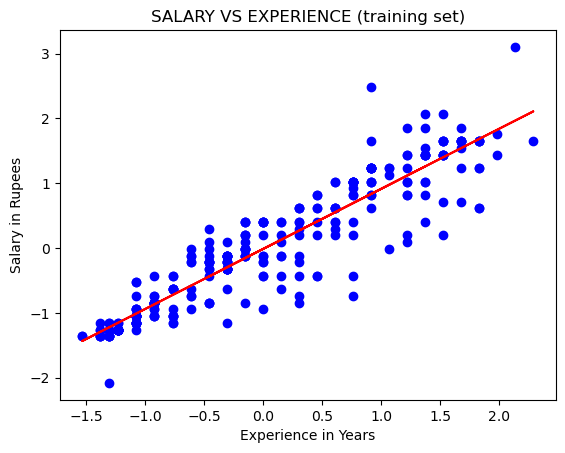

In [13]:
plt.scatter(x_train, y_train, color='b')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('SALARY VS EXPERIENCE (training set)')
plt.xlabel('Experience in Years')
plt.ylabel('Salary in Rupees')
plt.show()


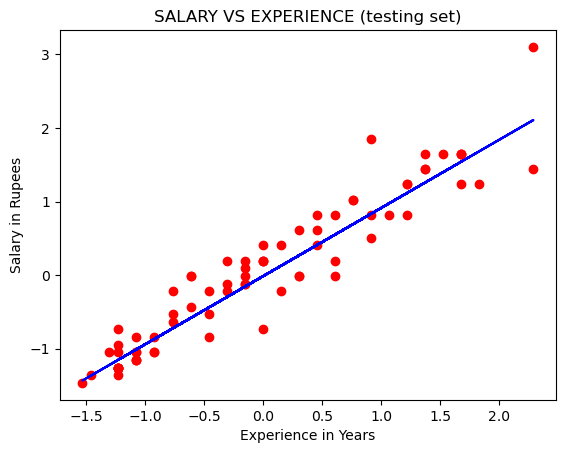

In [14]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, model.predict(x_test), color='b')
plt.title('SALARY VS EXPERIENCE (testing set)')
plt.xlabel('Experience in Years')
plt.ylabel('Salary in Rupees')
plt.show()

In [19]:
from sklearn.metrics import classification_report

In [18]:
conf_mat=metrics.confusion_matrix(y_test, prediction)
print('Confusion Matrix : ', conf_mat)
print()

Accuracy_score=metrics.accuracy_score(y_test,prediction) 
print('Accuracy Score : ', Accuracy_score) 
print()

print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

NameError: name 'metrics' is not defined

In [ ]:
conf_mat=pd.crosstab(y_test, prediction, rownames=['Actual'],colnames=['Predicted'])  
sns.heatmap(conf_mat, annot=True)
plt.show()

In [ ]:
conf_mat